In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()
ridge = Ridge()

### Without Passthrough

In [6]:
stacking_regressor2 = StackingRegressor(estimators=[('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=False)

In [7]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fd75815dbe0>)],
                  final_estimator=Ridge())

In [8]:
stacking_regressor2.score(X,y)

0.9919224713414312

In [9]:
stacking_regressor4 = StackingRegressor(estimators=[('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=5,
                                       passthrough=False)

In [10]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fd75815dbe0>)],
                  final_estimator=Ridge())

In [11]:
stacking_regressor4.score(X,y)

0.9920086147168766

In [12]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [13]:
scores4

{'fit_time': array([10.06153083, 10.07030725, 10.08226204, 10.07945609, 10.05597806]),
 'score_time': array([0.0084281 , 0.00823498, 0.006248  , 0.0062089 , 0.00630713]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fd78cdc3dc0>)],
                    final_estimator=Ridge()),
  StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fd770355100>)],
                    final_estimator=Ridge()),
  StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fd770349f70>)],
                    final_estimator=Ridge()),
  StackingRegressor(c

In [14]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [15]:
cat = evaluate_model(cb, X, y)

In [16]:
cat

,fit_time,score_time,test_score
0,5.365544,0.009538,0.920566
1,5.402090,0.009175,0.899820
2,5.371627,0.008464,0.938045
3,5.930945,0.009968,0.933383
4,11.326279,0.004692,0.949361
5,5.315125,0.008460,0.934502
6,11.288010,0.014903,0.944618
7,5.151520,0.007332,0.924652
8,5.977328,0.015541,0.947610
9,5.352562,0.003803,0.883656


In [17]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [18]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [19]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [20]:
df4

,fit_time,score_time,test_score
0,40.468409,0.016394,0.921809
1,37.468944,0.050740,0.897422
2,58.992068,0.038619,0.938233
3,34.552392,0.046932,0.934049
4,35.066411,0.052076,0.948956
5,53.731690,0.058222,0.933776
6,39.126219,0.020464,0.944884
7,50.957507,0.019375,0.925364
8,30.181251,0.017202,0.947544
9,43.094476,0.020837,0.884426


In [21]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [22]:
df4

,test_score_4
0,0.921809
1,0.897422
2,0.938233
3,0.934049
4,0.948956
5,0.933776
6,0.944884
7,0.925364
8,0.947544
9,0.884426


In [23]:
combo = pd.concat([cat, df4], axis=1)

In [24]:
combo

,cat_score,test_score_4
0,0.920566,0.921809
1,0.899820,0.897422
2,0.938045,0.938233
3,0.933383,0.934049
4,0.949361,0.948956
5,0.934502,0.933776
6,0.944618,0.944884
7,0.924652,0.925364
8,0.947610,0.947544
9,0.883656,0.884426


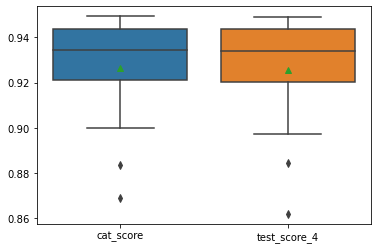

In [25]:
sns.boxplot(data=combo, showmeans=True);

In [26]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926385,0.925808
std,0.024378,0.025758
min,0.868666,0.861795
25%,0.921228,0.920172
50%,0.934502,0.934049
75%,0.943737,0.943780
max,0.949361,0.948956
